## Pipeline

 - 将多个数据处理步骤和模型训练封装为单一对象
 - 流程自动化
   
   将数据预处理（如标准化、编码、特征选择）和模型训练（如分类、回归）串联为一个整体流程，避免手动逐步调用函数。
 - 确保流程可重复
 - 避免数据泄漏
   
   在交叉验证时，确保每个训练集的预处理步骤（如缩放）仅基于训练数据计算统计量，而不是整个数据集。

 - 代码简洁性
   
   通过链式调用代替分散的步骤，提高代码可读性和可维护性。
 - 与超参数调优无缝集成
   结合 GridSearchCV 或 RandomizedSearchCV，可同时对预处理参数和模型参数进行调优。

 - 由多个Steps组成，每个Step是一个元组 (name, transformer_or_estimator)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipeline = Pipeline([
    ("scaler", StandardScaler()),  # 第一步：标准化
    ("svm", SVC())                 # 第二步：SVM 分类器
])

 - 转换器（Transformer）：实现 fit 和 transform 的类（如 StandardScaler）
 - 估计器（Estimator）：实现 fit 和 predict 的模型（如 SVC）

In [ ]:
# 基础训练与预测
# 直接像普通模型一样使用
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [ ]:
# 超参数搜索
from sklearn.model_selection import GridSearchCV

params = {
    "svm__C": [0.1, 1, 10],          # 格式：步骤名__参数名
    "scaler__with_mean": [True, False]
}

grid_search = GridSearchCV(pipeline, params, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

In [ ]:
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer

# 并行处理数值特征和文本特征
feature_union = FeatureUnion([
    ("numeric", StandardScaler()),
    ("text", TfidfVectorizer())
])

pipeline = Pipeline([
    ("features", feature_union),
    ("classifier", SVC())
])

### Notice

 - 步骤顺序敏感

    e.g. 缺失值填充——标准化

    e.g. 降维——特征选择

 - 仅支持顺序执行

   若需并行处理多个特征（如数值和文本），需用 FeatureUnion。
 - 避免在 Pipeline 中缓存大型数据
   
    memory 参数启用

### 对比

In [ ]:
# 非Pipeline
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # 必须用训练集的均值和方差！

model = SVC()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [ ]:
# Pipeline
pipeline = Pipeline([("scaler", StandardScaler()), ("svm", SVC())])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

## PCA

 - fit(self, X，Y=None)   模型训练，由于PCA是无监督学习，所以Y=None，没有标签；
 - fit_transform(self, X,Y=None)  训练模型，对X降维，返回降维后数据；
 - get_covariance(self)   获得协方差数据；
 - get_params(self,deep=True)  返回模型参数；
 - get_precision(self)  计算数据精度矩阵；
 - inverse_transform(self, X)   将降维后的数据转换成原始数据，可能不会完全一样；
 - score(self, X, Y=None)   计算所有样本的log似然平均值
 - transform(X) 将数据X转换成降维后的数据。

当模型训练好后，对于新输入的数据，都可以用transform方法来降维。

sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False)
 - n_components：降到几维

n_components=2 代表返回前2个主成分

n_components=None，返回所有主成分

n_components=‘mle’，将自动选取主成分个数n，使得满足所要求的方差百分比

0 < n_components < 1代表满足最低的主成分方差累计贡献率

 - copy：bool，默认True。是否复制原数据，因为降维时数据会变动。

copy=True时，fit_transform(X)，显示出降维后的数据。

copy=False时，fit(X).transform(X) ，才能够显示出降维后的数据。
 - whiten:bool,默认False

白化：预处理，降低输入数据的冗余性，使特征之间相关性较低，所有特征具有相同的方差。

降维后的数据: [[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]
 [-2.50694709  0.6450689 ]
 [-2.61275523  0.01472994]
 [-2.78610927 -0.235112  ]
 [-3.22380374 -0.51139459]
 [-2.64475039  1.17876464]
 [-2.38603903  1.33806233]
 [-2.62352788  0.81067951]
 [-2.64829671  0.31184914]
 [-2.19982032  0.87283904]
 [-2.5879864   0.51356031]
 [-2.31025622  0.39134594]
 [-2.54370523  0.43299606]
 [-3.21593942  0.13346807]
 [-2.30273318  0.09870885]
 [-2.35575405 -0.03728186]
 [-2.50666891 -0.14601688]
 [-2.46882007  0.13095149]
 [-2.56231991  0.36771886]
 [-2.63953472  0.31203998]
 [-2.63198939 -0.19696122]
 [-2.58739848 -0.20431849]
 [-2.4099325   0.41092426]
 [-2.64886233  0.81336382]
 [-2.59873675  1.09314576]
 [-2.63692688 -0.12132235]
 [-2.86624165  0.06936447]
 [-2.62523805  0.599

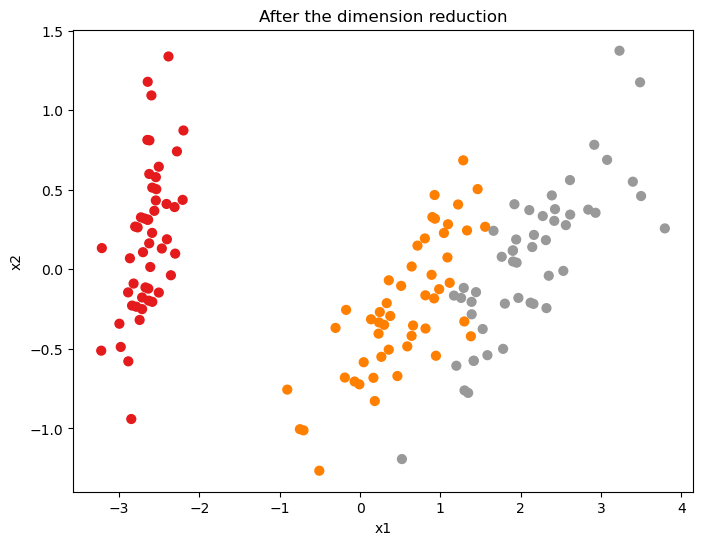

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition,datasets

iris=datasets.load_iris()
X=iris.data

model=decomposition.PCA(n_components=2)
model.fit(X)
X_new=model.fit_transform(X)
Maxcomponent=model.components_   #  components_：返回最大方差的主成分。
ratio=model.explained_variance_ratio_  # 降维后的各主成分的方差值占总方差值的比例
score=model.score(X)

print('降维后的数据:',X_new)
print('返回具有最大方差的成分:',Maxcomponent)
print('保留主成分的方差贡献率:',ratio)
print('所有样本的log似然平均值:',score)
print('奇异值:',model.singular_values_)  # 降维时使用了奇异值分解
print('噪声协方差:',model.noise_variance_)

g1=plt.figure(1,figsize=(8,6))
plt.scatter(X_new[:,0],X_new[:,1],c = iris.target,cmap=plt.cm.Set1, s=40)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('After the dimension reduction')
plt.show()

## 数据增强的操作

In [ ]:
'''
用albumentations库
'''
import albumentations as A

augmenter = A.Compose([A.Rotate(limit=20)])
X_augmented = np.array([augmenter(image=img)["image"] for img in X_images])

In [ ]:
# 标签匹配
n_augmented = 4  # 每个样本生成 4 个增强样本
y_combined = np.hstack([y, np.repeat(y, n_augmented)])

In [ ]:
'''
动态增强
'''
# TensorFlow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=20)
datagen.fit(X_images)
# 在训练时通过生成器实时增强
model.fit(datagen.flow(X_images, y, batch_size=32), ...)

## GridSearchCV调优&Pipeline

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 11)

# 定义pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC())
])

# 参数网格
param_grid = [
    {'clf': [SVC()],  # 测试SVM模型
     'clf__C': [0.1, 1, 10],    # SVM的正则化参数，clf__C表示流水线中clf步骤的C参数
     'clf__kernel': ['linear', 'rbf']}, # SVM的核函数类型
    {'clf': [KNeighborsClassifier()],  # 测试KNN模型
     'clf__n_neighbors': [3, 5, 7]} # KNN的邻居数
]

# 网格搜索
grid_search = GridSearchCV(
    pipeline, # 要优化的流水线
    param_grid,  # 参数组合列表
    cv=5, # 5折交叉验证
    scoring='accuracy' # 评估指标为准确率
)
grid_search.fit(X_train, y_train) # 开始搜索

print("Best parameters:", grid_search.best_params_) # 表现最好的参数组合
print("Best score:", grid_search.best_score_) # 准确率

Best parameters: {'clf': SVC(), 'clf__C': 0.1, 'clf__kernel': 'linear'}
Best score: 0.9583333333333334
